# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## plot the data

## define the feature function for each data to obtain the best accuracy

In [3]:
def feature_function1(x, y):
    # x -> data1[:,0]
    # y -> data1[:,1]
    
    column0 = np.ones(shape=(len(x),))
    column1 = x
    column2 = y
    column3 = np.power(x, 2)
    column4 = np.power(y, 2) # (1000,1)
    
    feature = np.c_[column0, column1, column2, column3, column4] # (1000,5)
    
    return feature

In [4]:
def feature_function2(x, y):
    # x -> data2[:,0]
    # y -> data2[:,1]
    
    column0 = np.ones(shape=(len(x),))
    column1 = x
    column2 = np.power(x, 2)
    column3 = np.power(x, 3)
    column4 = y # (1000,1)
    
    feature = np.c_[column0, column1, column2, column3, column4] # (1000,5)
    
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [5]:
def regression_function(theta, feature):
    
    value = np.dot(feature, theta.T)
    
    return value

## define sigmoid function with input $x$

In [6]:
def sigmoid(z):
    
    # sigmoid function 
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

In [7]:
# Logistic regression function
def logistic_regression(theta, feature):
    
    h = sigmoid(regression_function(theta, feature))
    
    return h

## define loss function with feature and label based on the logistic regression

In [8]:
def compute_loss_feature(theta, feature, label):

    h = logistic_regression(theta, feature)
    loss = (1 / len(h)) * np.sum((-label*np.log(h) - (1-label)*np.log(1-h)))
    
    return loss

## define gradient vector for the model parameters $\theta$

In [9]:
def compute_gradient_feature(theta, feature, label):
    
    gradient = (1 / len(feature[0])) * np.dot(feature.T,  (logistic_regression(theta, feature) - label))
    
    return gradient

## compute the accuracy

In [1]:
def compute_accuracy(theta, feature, label):
    
    predict_label = []
    
    for i in logistic_regression(theta, feature):
        if i >= 0.5 :
            predict_label.append(1)
        else :
            predict_label.append(0)
    
    accuracy = (np.array(predict_label) == label).sum() / len(label)

    return accuracy

## gradient descent for the model parameters $\theta$

In [11]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001           # USE THIS VALUE for the learning rate

theta1 = np.array((0,0,0,0,0))
theta2 = np.array((0,0,0,0,0))


In [12]:
theta1_iteration = np.zeros((num_iteration, theta1.size))
theta2_iteration = np.zeros((num_iteration, theta2.size))

loss1_iteration  = np.zeros(num_iteration)
loss2_iteration  = np.zeros(num_iteration)

In [13]:
feature1 = feature_function1(data1[:,0], data1[:,1])
label1 = data1[:,2]

feature2 = feature_function2(data2[:,0], data2[:,1])
label2 = data2[:,2]

In [14]:
for i in range(num_iteration):
    
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, label1)
    theta1_iteration[i] = theta1
    
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, label2)
    theta2_iteration[i] = theta2
    
    loss1 = compute_loss_feature(theta1, feature1, label1)
    loss1_iteration[i] = loss1
    
    loss2 = compute_loss_feature(theta2, feature2, label2)
    loss2_iteration[i] = loss2
    
    print("iteration = %4d, loss1 = %5.5f" % (i, loss1), end=", ")
    print("loss2 = %5.5f" % loss2)

theta1_optimal = theta1
theta2_optimal = theta2

iteration =    0, loss1 = 0.63130, loss2 = 0.60559
iteration =    1, loss1 = 0.57472, loss2 = 0.57326
iteration =    2, loss1 = 0.55789, loss2 = 0.55320
iteration =    3, loss1 = 0.54702, loss2 = 0.53793
iteration =    4, loss1 = 0.53694, loss2 = 0.52522
iteration =    5, loss1 = 0.52748, loss2 = 0.51414
iteration =    6, loss1 = 0.51853, loss2 = 0.50425
iteration =    7, loss1 = 0.50998, loss2 = 0.49527
iteration =    8, loss1 = 0.50177, loss2 = 0.48704
iteration =    9, loss1 = 0.49387, loss2 = 0.47943
iteration =   10, loss1 = 0.48623, loss2 = 0.47237
iteration =   11, loss1 = 0.47882, loss2 = 0.46578
iteration =   12, loss1 = 0.47164, loss2 = 0.45962
iteration =   13, loss1 = 0.46465, loss2 = 0.45383
iteration =   14, loss1 = 0.45784, loss2 = 0.44838
iteration =   15, loss1 = 0.45121, loss2 = 0.44323
iteration =   16, loss1 = 0.44475, loss2 = 0.43837
iteration =   17, loss1 = 0.43845, loss2 = 0.43375
iteration =   18, loss1 = 0.43229, loss2 = 0.42938
iteration =   19, loss1 = 0.426

iteration =  616, loss1 = 0.04614, loss2 = 0.15250
iteration =  617, loss1 = 0.04609, loss2 = 0.15239
iteration =  618, loss1 = 0.04603, loss2 = 0.15228
iteration =  619, loss1 = 0.04597, loss2 = 0.15216
iteration =  620, loss1 = 0.04591, loss2 = 0.15205
iteration =  621, loss1 = 0.04585, loss2 = 0.15194
iteration =  622, loss1 = 0.04580, loss2 = 0.15183
iteration =  623, loss1 = 0.04574, loss2 = 0.15172
iteration =  624, loss1 = 0.04568, loss2 = 0.15161
iteration =  625, loss1 = 0.04563, loss2 = 0.15150
iteration =  626, loss1 = 0.04557, loss2 = 0.15139
iteration =  627, loss1 = 0.04551, loss2 = 0.15128
iteration =  628, loss1 = 0.04546, loss2 = 0.15117
iteration =  629, loss1 = 0.04540, loss2 = 0.15106
iteration =  630, loss1 = 0.04534, loss2 = 0.15095
iteration =  631, loss1 = 0.04529, loss2 = 0.15084
iteration =  632, loss1 = 0.04523, loss2 = 0.15073
iteration =  633, loss1 = 0.04518, loss2 = 0.15062
iteration =  634, loss1 = 0.04512, loss2 = 0.15051
iteration =  635, loss1 = 0.045

iteration = 1283, loss1 = 0.02665, loss2 = 0.10662
iteration = 1284, loss1 = 0.02663, loss2 = 0.10658
iteration = 1285, loss1 = 0.02662, loss2 = 0.10653
iteration = 1286, loss1 = 0.02660, loss2 = 0.10649
iteration = 1287, loss1 = 0.02659, loss2 = 0.10645
iteration = 1288, loss1 = 0.02657, loss2 = 0.10641
iteration = 1289, loss1 = 0.02656, loss2 = 0.10636
iteration = 1290, loss1 = 0.02654, loss2 = 0.10632
iteration = 1291, loss1 = 0.02653, loss2 = 0.10628
iteration = 1292, loss1 = 0.02651, loss2 = 0.10624
iteration = 1293, loss1 = 0.02650, loss2 = 0.10620
iteration = 1294, loss1 = 0.02649, loss2 = 0.10615
iteration = 1295, loss1 = 0.02647, loss2 = 0.10611
iteration = 1296, loss1 = 0.02646, loss2 = 0.10607
iteration = 1297, loss1 = 0.02644, loss2 = 0.10603
iteration = 1298, loss1 = 0.02643, loss2 = 0.10598
iteration = 1299, loss1 = 0.02641, loss2 = 0.10594
iteration = 1300, loss1 = 0.02640, loss2 = 0.10590
iteration = 1301, loss1 = 0.02638, loss2 = 0.10586
iteration = 1302, loss1 = 0.026

iteration = 1956, loss1 = 0.01994, loss2 = 0.08561
iteration = 1957, loss1 = 0.01993, loss2 = 0.08558
iteration = 1958, loss1 = 0.01993, loss2 = 0.08556
iteration = 1959, loss1 = 0.01992, loss2 = 0.08554
iteration = 1960, loss1 = 0.01991, loss2 = 0.08551
iteration = 1961, loss1 = 0.01991, loss2 = 0.08549
iteration = 1962, loss1 = 0.01990, loss2 = 0.08547
iteration = 1963, loss1 = 0.01989, loss2 = 0.08545
iteration = 1964, loss1 = 0.01989, loss2 = 0.08542
iteration = 1965, loss1 = 0.01988, loss2 = 0.08540
iteration = 1966, loss1 = 0.01987, loss2 = 0.08538
iteration = 1967, loss1 = 0.01987, loss2 = 0.08535
iteration = 1968, loss1 = 0.01986, loss2 = 0.08533
iteration = 1969, loss1 = 0.01985, loss2 = 0.08531
iteration = 1970, loss1 = 0.01985, loss2 = 0.08529
iteration = 1971, loss1 = 0.01984, loss2 = 0.08526
iteration = 1972, loss1 = 0.01983, loss2 = 0.08524
iteration = 1973, loss1 = 0.01983, loss2 = 0.08522
iteration = 1974, loss1 = 0.01982, loss2 = 0.08520
iteration = 1975, loss1 = 0.019

iteration = 2639, loss1 = 0.01646, loss2 = 0.07318
iteration = 2640, loss1 = 0.01645, loss2 = 0.07317
iteration = 2641, loss1 = 0.01645, loss2 = 0.07316
iteration = 2642, loss1 = 0.01645, loss2 = 0.07314
iteration = 2643, loss1 = 0.01644, loss2 = 0.07313
iteration = 2644, loss1 = 0.01644, loss2 = 0.07311
iteration = 2645, loss1 = 0.01643, loss2 = 0.07310
iteration = 2646, loss1 = 0.01643, loss2 = 0.07308
iteration = 2647, loss1 = 0.01643, loss2 = 0.07307
iteration = 2648, loss1 = 0.01642, loss2 = 0.07305
iteration = 2649, loss1 = 0.01642, loss2 = 0.07304
iteration = 2650, loss1 = 0.01641, loss2 = 0.07303
iteration = 2651, loss1 = 0.01641, loss2 = 0.07301
iteration = 2652, loss1 = 0.01641, loss2 = 0.07300
iteration = 2653, loss1 = 0.01640, loss2 = 0.07298
iteration = 2654, loss1 = 0.01640, loss2 = 0.07297
iteration = 2655, loss1 = 0.01640, loss2 = 0.07295
iteration = 2656, loss1 = 0.01639, loss2 = 0.07294
iteration = 2657, loss1 = 0.01639, loss2 = 0.07293
iteration = 2658, loss1 = 0.016

iteration = 3233, loss1 = 0.01455, loss2 = 0.06586
iteration = 3234, loss1 = 0.01455, loss2 = 0.06585
iteration = 3235, loss1 = 0.01455, loss2 = 0.06584
iteration = 3236, loss1 = 0.01455, loss2 = 0.06583
iteration = 3237, loss1 = 0.01454, loss2 = 0.06582
iteration = 3238, loss1 = 0.01454, loss2 = 0.06581
iteration = 3239, loss1 = 0.01454, loss2 = 0.06580
iteration = 3240, loss1 = 0.01454, loss2 = 0.06579
iteration = 3241, loss1 = 0.01453, loss2 = 0.06578
iteration = 3242, loss1 = 0.01453, loss2 = 0.06577
iteration = 3243, loss1 = 0.01453, loss2 = 0.06575
iteration = 3244, loss1 = 0.01453, loss2 = 0.06574
iteration = 3245, loss1 = 0.01452, loss2 = 0.06573
iteration = 3246, loss1 = 0.01452, loss2 = 0.06572
iteration = 3247, loss1 = 0.01452, loss2 = 0.06571
iteration = 3248, loss1 = 0.01451, loss2 = 0.06570
iteration = 3249, loss1 = 0.01451, loss2 = 0.06569
iteration = 3250, loss1 = 0.01451, loss2 = 0.06568
iteration = 3251, loss1 = 0.01451, loss2 = 0.06567
iteration = 3252, loss1 = 0.014

iteration = 3827, loss1 = 0.01320, loss2 = 0.06039
iteration = 3828, loss1 = 0.01320, loss2 = 0.06038
iteration = 3829, loss1 = 0.01320, loss2 = 0.06037
iteration = 3830, loss1 = 0.01320, loss2 = 0.06036
iteration = 3831, loss1 = 0.01320, loss2 = 0.06036
iteration = 3832, loss1 = 0.01319, loss2 = 0.06035
iteration = 3833, loss1 = 0.01319, loss2 = 0.06034
iteration = 3834, loss1 = 0.01319, loss2 = 0.06033
iteration = 3835, loss1 = 0.01319, loss2 = 0.06032
iteration = 3836, loss1 = 0.01319, loss2 = 0.06032
iteration = 3837, loss1 = 0.01319, loss2 = 0.06031
iteration = 3838, loss1 = 0.01318, loss2 = 0.06030
iteration = 3839, loss1 = 0.01318, loss2 = 0.06029
iteration = 3840, loss1 = 0.01318, loss2 = 0.06028
iteration = 3841, loss1 = 0.01318, loss2 = 0.06028
iteration = 3842, loss1 = 0.01318, loss2 = 0.06027
iteration = 3843, loss1 = 0.01317, loss2 = 0.06026
iteration = 3844, loss1 = 0.01317, loss2 = 0.06025
iteration = 3845, loss1 = 0.01317, loss2 = 0.06024
iteration = 3846, loss1 = 0.013

iteration = 4478, loss1 = 0.01211, loss2 = 0.05575
iteration = 4479, loss1 = 0.01211, loss2 = 0.05575
iteration = 4480, loss1 = 0.01211, loss2 = 0.05574
iteration = 4481, loss1 = 0.01210, loss2 = 0.05573
iteration = 4482, loss1 = 0.01210, loss2 = 0.05573
iteration = 4483, loss1 = 0.01210, loss2 = 0.05572
iteration = 4484, loss1 = 0.01210, loss2 = 0.05572
iteration = 4485, loss1 = 0.01210, loss2 = 0.05571
iteration = 4486, loss1 = 0.01210, loss2 = 0.05570
iteration = 4487, loss1 = 0.01209, loss2 = 0.05570
iteration = 4488, loss1 = 0.01209, loss2 = 0.05569
iteration = 4489, loss1 = 0.01209, loss2 = 0.05568
iteration = 4490, loss1 = 0.01209, loss2 = 0.05568
iteration = 4491, loss1 = 0.01209, loss2 = 0.05567
iteration = 4492, loss1 = 0.01209, loss2 = 0.05567
iteration = 4493, loss1 = 0.01209, loss2 = 0.05566
iteration = 4494, loss1 = 0.01208, loss2 = 0.05565
iteration = 4495, loss1 = 0.01208, loss2 = 0.05565
iteration = 4496, loss1 = 0.01208, loss2 = 0.05564
iteration = 4497, loss1 = 0.012

iteration = 5141, loss1 = 0.01126, loss2 = 0.05202
iteration = 5142, loss1 = 0.01126, loss2 = 0.05201
iteration = 5143, loss1 = 0.01125, loss2 = 0.05201
iteration = 5144, loss1 = 0.01125, loss2 = 0.05200
iteration = 5145, loss1 = 0.01125, loss2 = 0.05200
iteration = 5146, loss1 = 0.01125, loss2 = 0.05199
iteration = 5147, loss1 = 0.01125, loss2 = 0.05199
iteration = 5148, loss1 = 0.01125, loss2 = 0.05198
iteration = 5149, loss1 = 0.01125, loss2 = 0.05198
iteration = 5150, loss1 = 0.01125, loss2 = 0.05197
iteration = 5151, loss1 = 0.01124, loss2 = 0.05197
iteration = 5152, loss1 = 0.01124, loss2 = 0.05196
iteration = 5153, loss1 = 0.01124, loss2 = 0.05196
iteration = 5154, loss1 = 0.01124, loss2 = 0.05195
iteration = 5155, loss1 = 0.01124, loss2 = 0.05195
iteration = 5156, loss1 = 0.01124, loss2 = 0.05194
iteration = 5157, loss1 = 0.01124, loss2 = 0.05194
iteration = 5158, loss1 = 0.01124, loss2 = 0.05193
iteration = 5159, loss1 = 0.01124, loss2 = 0.05193
iteration = 5160, loss1 = 0.011

iteration = 5815, loss1 = 0.01057, loss2 = 0.04893
iteration = 5816, loss1 = 0.01057, loss2 = 0.04893
iteration = 5817, loss1 = 0.01057, loss2 = 0.04892
iteration = 5818, loss1 = 0.01057, loss2 = 0.04892
iteration = 5819, loss1 = 0.01057, loss2 = 0.04891
iteration = 5820, loss1 = 0.01057, loss2 = 0.04891
iteration = 5821, loss1 = 0.01057, loss2 = 0.04891
iteration = 5822, loss1 = 0.01057, loss2 = 0.04890
iteration = 5823, loss1 = 0.01057, loss2 = 0.04890
iteration = 5824, loss1 = 0.01057, loss2 = 0.04889
iteration = 5825, loss1 = 0.01057, loss2 = 0.04889
iteration = 5826, loss1 = 0.01056, loss2 = 0.04888
iteration = 5827, loss1 = 0.01056, loss2 = 0.04888
iteration = 5828, loss1 = 0.01056, loss2 = 0.04888
iteration = 5829, loss1 = 0.01056, loss2 = 0.04887
iteration = 5830, loss1 = 0.01056, loss2 = 0.04887
iteration = 5831, loss1 = 0.01056, loss2 = 0.04886
iteration = 5832, loss1 = 0.01056, loss2 = 0.04886
iteration = 5833, loss1 = 0.01056, loss2 = 0.04886
iteration = 5834, loss1 = 0.010

iteration = 6467, loss1 = 0.01004, loss2 = 0.04644
iteration = 6468, loss1 = 0.01004, loss2 = 0.04644
iteration = 6469, loss1 = 0.01004, loss2 = 0.04643
iteration = 6470, loss1 = 0.01004, loss2 = 0.04643
iteration = 6471, loss1 = 0.01004, loss2 = 0.04643
iteration = 6472, loss1 = 0.01004, loss2 = 0.04642
iteration = 6473, loss1 = 0.01003, loss2 = 0.04642
iteration = 6474, loss1 = 0.01003, loss2 = 0.04642
iteration = 6475, loss1 = 0.01003, loss2 = 0.04641
iteration = 6476, loss1 = 0.01003, loss2 = 0.04641
iteration = 6477, loss1 = 0.01003, loss2 = 0.04641
iteration = 6478, loss1 = 0.01003, loss2 = 0.04640
iteration = 6479, loss1 = 0.01003, loss2 = 0.04640
iteration = 6480, loss1 = 0.01003, loss2 = 0.04640
iteration = 6481, loss1 = 0.01003, loss2 = 0.04639
iteration = 6482, loss1 = 0.01003, loss2 = 0.04639
iteration = 6483, loss1 = 0.01003, loss2 = 0.04638
iteration = 6484, loss1 = 0.01003, loss2 = 0.04638
iteration = 6485, loss1 = 0.01003, loss2 = 0.04638
iteration = 6486, loss1 = 0.010

iteration = 7117, loss1 = 0.00960, loss2 = 0.04433
iteration = 7118, loss1 = 0.00959, loss2 = 0.04432
iteration = 7119, loss1 = 0.00959, loss2 = 0.04432
iteration = 7120, loss1 = 0.00959, loss2 = 0.04432
iteration = 7121, loss1 = 0.00959, loss2 = 0.04431
iteration = 7122, loss1 = 0.00959, loss2 = 0.04431
iteration = 7123, loss1 = 0.00959, loss2 = 0.04431
iteration = 7124, loss1 = 0.00959, loss2 = 0.04430
iteration = 7125, loss1 = 0.00959, loss2 = 0.04430
iteration = 7126, loss1 = 0.00959, loss2 = 0.04430
iteration = 7127, loss1 = 0.00959, loss2 = 0.04430
iteration = 7128, loss1 = 0.00959, loss2 = 0.04429
iteration = 7129, loss1 = 0.00959, loss2 = 0.04429
iteration = 7130, loss1 = 0.00959, loss2 = 0.04429
iteration = 7131, loss1 = 0.00959, loss2 = 0.04428
iteration = 7132, loss1 = 0.00959, loss2 = 0.04428
iteration = 7133, loss1 = 0.00959, loss2 = 0.04428
iteration = 7134, loss1 = 0.00958, loss2 = 0.04427
iteration = 7135, loss1 = 0.00958, loss2 = 0.04427
iteration = 7136, loss1 = 0.009

iteration = 7732, loss1 = 0.00924, loss2 = 0.04259
iteration = 7733, loss1 = 0.00924, loss2 = 0.04259
iteration = 7734, loss1 = 0.00924, loss2 = 0.04258
iteration = 7735, loss1 = 0.00924, loss2 = 0.04258
iteration = 7736, loss1 = 0.00924, loss2 = 0.04258
iteration = 7737, loss1 = 0.00924, loss2 = 0.04258
iteration = 7738, loss1 = 0.00924, loss2 = 0.04257
iteration = 7739, loss1 = 0.00923, loss2 = 0.04257
iteration = 7740, loss1 = 0.00923, loss2 = 0.04257
iteration = 7741, loss1 = 0.00923, loss2 = 0.04256
iteration = 7742, loss1 = 0.00923, loss2 = 0.04256
iteration = 7743, loss1 = 0.00923, loss2 = 0.04256
iteration = 7744, loss1 = 0.00923, loss2 = 0.04256
iteration = 7745, loss1 = 0.00923, loss2 = 0.04255
iteration = 7746, loss1 = 0.00923, loss2 = 0.04255
iteration = 7747, loss1 = 0.00923, loss2 = 0.04255
iteration = 7748, loss1 = 0.00923, loss2 = 0.04255
iteration = 7749, loss1 = 0.00923, loss2 = 0.04254
iteration = 7750, loss1 = 0.00923, loss2 = 0.04254
iteration = 7751, loss1 = 0.009

iteration = 8373, loss1 = 0.00892, loss2 = 0.04100
iteration = 8374, loss1 = 0.00892, loss2 = 0.04099
iteration = 8375, loss1 = 0.00892, loss2 = 0.04099
iteration = 8376, loss1 = 0.00892, loss2 = 0.04099
iteration = 8377, loss1 = 0.00892, loss2 = 0.04099
iteration = 8378, loss1 = 0.00891, loss2 = 0.04098
iteration = 8379, loss1 = 0.00891, loss2 = 0.04098
iteration = 8380, loss1 = 0.00891, loss2 = 0.04098
iteration = 8381, loss1 = 0.00891, loss2 = 0.04098
iteration = 8382, loss1 = 0.00891, loss2 = 0.04097
iteration = 8383, loss1 = 0.00891, loss2 = 0.04097
iteration = 8384, loss1 = 0.00891, loss2 = 0.04097
iteration = 8385, loss1 = 0.00891, loss2 = 0.04097
iteration = 8386, loss1 = 0.00891, loss2 = 0.04097
iteration = 8387, loss1 = 0.00891, loss2 = 0.04096
iteration = 8388, loss1 = 0.00891, loss2 = 0.04096
iteration = 8389, loss1 = 0.00891, loss2 = 0.04096
iteration = 8390, loss1 = 0.00891, loss2 = 0.04096
iteration = 8391, loss1 = 0.00891, loss2 = 0.04095
iteration = 8392, loss1 = 0.008

iteration = 8967, loss1 = 0.00866, loss2 = 0.03968
iteration = 8968, loss1 = 0.00866, loss2 = 0.03968
iteration = 8969, loss1 = 0.00866, loss2 = 0.03968
iteration = 8970, loss1 = 0.00866, loss2 = 0.03968
iteration = 8971, loss1 = 0.00866, loss2 = 0.03967
iteration = 8972, loss1 = 0.00865, loss2 = 0.03967
iteration = 8973, loss1 = 0.00865, loss2 = 0.03967
iteration = 8974, loss1 = 0.00865, loss2 = 0.03967
iteration = 8975, loss1 = 0.00865, loss2 = 0.03966
iteration = 8976, loss1 = 0.00865, loss2 = 0.03966
iteration = 8977, loss1 = 0.00865, loss2 = 0.03966
iteration = 8978, loss1 = 0.00865, loss2 = 0.03966
iteration = 8979, loss1 = 0.00865, loss2 = 0.03966
iteration = 8980, loss1 = 0.00865, loss2 = 0.03965
iteration = 8981, loss1 = 0.00865, loss2 = 0.03965
iteration = 8982, loss1 = 0.00865, loss2 = 0.03965
iteration = 8983, loss1 = 0.00865, loss2 = 0.03965
iteration = 8984, loss1 = 0.00865, loss2 = 0.03965
iteration = 8985, loss1 = 0.00865, loss2 = 0.03964
iteration = 8986, loss1 = 0.008

iteration = 9642, loss1 = 0.00840, loss2 = 0.03834
iteration = 9643, loss1 = 0.00840, loss2 = 0.03834
iteration = 9644, loss1 = 0.00840, loss2 = 0.03834
iteration = 9645, loss1 = 0.00840, loss2 = 0.03834
iteration = 9646, loss1 = 0.00839, loss2 = 0.03834
iteration = 9647, loss1 = 0.00839, loss2 = 0.03833
iteration = 9648, loss1 = 0.00839, loss2 = 0.03833
iteration = 9649, loss1 = 0.00839, loss2 = 0.03833
iteration = 9650, loss1 = 0.00839, loss2 = 0.03833
iteration = 9651, loss1 = 0.00839, loss2 = 0.03833
iteration = 9652, loss1 = 0.00839, loss2 = 0.03833
iteration = 9653, loss1 = 0.00839, loss2 = 0.03832
iteration = 9654, loss1 = 0.00839, loss2 = 0.03832
iteration = 9655, loss1 = 0.00839, loss2 = 0.03832
iteration = 9656, loss1 = 0.00839, loss2 = 0.03832
iteration = 9657, loss1 = 0.00839, loss2 = 0.03832
iteration = 9658, loss1 = 0.00839, loss2 = 0.03831
iteration = 9659, loss1 = 0.00839, loss2 = 0.03831
iteration = 9660, loss1 = 0.00839, loss2 = 0.03831
iteration = 9661, loss1 = 0.008

iteration = 10317, loss1 = 0.00817, loss2 = 0.03715
iteration = 10318, loss1 = 0.00817, loss2 = 0.03714
iteration = 10319, loss1 = 0.00817, loss2 = 0.03714
iteration = 10320, loss1 = 0.00817, loss2 = 0.03714
iteration = 10321, loss1 = 0.00817, loss2 = 0.03714
iteration = 10322, loss1 = 0.00817, loss2 = 0.03714
iteration = 10323, loss1 = 0.00816, loss2 = 0.03714
iteration = 10324, loss1 = 0.00816, loss2 = 0.03713
iteration = 10325, loss1 = 0.00816, loss2 = 0.03713
iteration = 10326, loss1 = 0.00816, loss2 = 0.03713
iteration = 10327, loss1 = 0.00816, loss2 = 0.03713
iteration = 10328, loss1 = 0.00816, loss2 = 0.03713
iteration = 10329, loss1 = 0.00816, loss2 = 0.03713
iteration = 10330, loss1 = 0.00816, loss2 = 0.03712
iteration = 10331, loss1 = 0.00816, loss2 = 0.03712
iteration = 10332, loss1 = 0.00816, loss2 = 0.03712
iteration = 10333, loss1 = 0.00816, loss2 = 0.03712
iteration = 10334, loss1 = 0.00816, loss2 = 0.03712
iteration = 10335, loss1 = 0.00816, loss2 = 0.03712
iteration = 

iteration = 10991, loss1 = 0.00796, loss2 = 0.03606
iteration = 10992, loss1 = 0.00796, loss2 = 0.03606
iteration = 10993, loss1 = 0.00796, loss2 = 0.03606
iteration = 10994, loss1 = 0.00796, loss2 = 0.03606
iteration = 10995, loss1 = 0.00796, loss2 = 0.03606
iteration = 10996, loss1 = 0.00796, loss2 = 0.03606
iteration = 10997, loss1 = 0.00796, loss2 = 0.03605
iteration = 10998, loss1 = 0.00796, loss2 = 0.03605
iteration = 10999, loss1 = 0.00796, loss2 = 0.03605
iteration = 11000, loss1 = 0.00796, loss2 = 0.03605
iteration = 11001, loss1 = 0.00796, loss2 = 0.03605
iteration = 11002, loss1 = 0.00796, loss2 = 0.03605
iteration = 11003, loss1 = 0.00796, loss2 = 0.03605
iteration = 11004, loss1 = 0.00796, loss2 = 0.03604
iteration = 11005, loss1 = 0.00796, loss2 = 0.03604
iteration = 11006, loss1 = 0.00796, loss2 = 0.03604
iteration = 11007, loss1 = 0.00796, loss2 = 0.03604
iteration = 11008, loss1 = 0.00796, loss2 = 0.03604
iteration = 11009, loss1 = 0.00796, loss2 = 0.03604
iteration = 

iteration = 11640, loss1 = 0.00779, loss2 = 0.03512
iteration = 11641, loss1 = 0.00779, loss2 = 0.03511
iteration = 11642, loss1 = 0.00779, loss2 = 0.03511
iteration = 11643, loss1 = 0.00779, loss2 = 0.03511
iteration = 11644, loss1 = 0.00779, loss2 = 0.03511
iteration = 11645, loss1 = 0.00779, loss2 = 0.03511
iteration = 11646, loss1 = 0.00779, loss2 = 0.03511
iteration = 11647, loss1 = 0.00779, loss2 = 0.03511
iteration = 11648, loss1 = 0.00778, loss2 = 0.03510
iteration = 11649, loss1 = 0.00778, loss2 = 0.03510
iteration = 11650, loss1 = 0.00778, loss2 = 0.03510
iteration = 11651, loss1 = 0.00778, loss2 = 0.03510
iteration = 11652, loss1 = 0.00778, loss2 = 0.03510
iteration = 11653, loss1 = 0.00778, loss2 = 0.03510
iteration = 11654, loss1 = 0.00778, loss2 = 0.03510
iteration = 11655, loss1 = 0.00778, loss2 = 0.03509
iteration = 11656, loss1 = 0.00778, loss2 = 0.03509
iteration = 11657, loss1 = 0.00778, loss2 = 0.03509
iteration = 11658, loss1 = 0.00778, loss2 = 0.03509
iteration = 

iteration = 12283, loss1 = 0.00763, loss2 = 0.03425
iteration = 12284, loss1 = 0.00763, loss2 = 0.03425
iteration = 12285, loss1 = 0.00763, loss2 = 0.03425
iteration = 12286, loss1 = 0.00763, loss2 = 0.03425
iteration = 12287, loss1 = 0.00763, loss2 = 0.03425
iteration = 12288, loss1 = 0.00763, loss2 = 0.03425
iteration = 12289, loss1 = 0.00763, loss2 = 0.03424
iteration = 12290, loss1 = 0.00763, loss2 = 0.03424
iteration = 12291, loss1 = 0.00763, loss2 = 0.03424
iteration = 12292, loss1 = 0.00763, loss2 = 0.03424
iteration = 12293, loss1 = 0.00763, loss2 = 0.03424
iteration = 12294, loss1 = 0.00763, loss2 = 0.03424
iteration = 12295, loss1 = 0.00763, loss2 = 0.03424
iteration = 12296, loss1 = 0.00763, loss2 = 0.03424
iteration = 12297, loss1 = 0.00763, loss2 = 0.03423
iteration = 12298, loss1 = 0.00763, loss2 = 0.03423
iteration = 12299, loss1 = 0.00763, loss2 = 0.03423
iteration = 12300, loss1 = 0.00762, loss2 = 0.03423
iteration = 12301, loss1 = 0.00762, loss2 = 0.03423
iteration = 

iteration = 12931, loss1 = 0.00748, loss2 = 0.03345
iteration = 12932, loss1 = 0.00748, loss2 = 0.03345
iteration = 12933, loss1 = 0.00748, loss2 = 0.03345
iteration = 12934, loss1 = 0.00748, loss2 = 0.03345
iteration = 12935, loss1 = 0.00748, loss2 = 0.03345
iteration = 12936, loss1 = 0.00748, loss2 = 0.03344
iteration = 12937, loss1 = 0.00748, loss2 = 0.03344
iteration = 12938, loss1 = 0.00748, loss2 = 0.03344
iteration = 12939, loss1 = 0.00748, loss2 = 0.03344
iteration = 12940, loss1 = 0.00748, loss2 = 0.03344
iteration = 12941, loss1 = 0.00748, loss2 = 0.03344
iteration = 12942, loss1 = 0.00748, loss2 = 0.03344
iteration = 12943, loss1 = 0.00748, loss2 = 0.03344
iteration = 12944, loss1 = 0.00748, loss2 = 0.03343
iteration = 12945, loss1 = 0.00748, loss2 = 0.03343
iteration = 12946, loss1 = 0.00748, loss2 = 0.03343
iteration = 12947, loss1 = 0.00748, loss2 = 0.03343
iteration = 12948, loss1 = 0.00748, loss2 = 0.03343
iteration = 12949, loss1 = 0.00748, loss2 = 0.03343
iteration = 

iteration = 13599, loss1 = 0.00735, loss2 = 0.03268
iteration = 13600, loss1 = 0.00735, loss2 = 0.03268
iteration = 13601, loss1 = 0.00735, loss2 = 0.03268
iteration = 13602, loss1 = 0.00735, loss2 = 0.03268
iteration = 13603, loss1 = 0.00735, loss2 = 0.03268
iteration = 13604, loss1 = 0.00735, loss2 = 0.03268
iteration = 13605, loss1 = 0.00735, loss2 = 0.03268
iteration = 13606, loss1 = 0.00735, loss2 = 0.03268
iteration = 13607, loss1 = 0.00735, loss2 = 0.03268
iteration = 13608, loss1 = 0.00735, loss2 = 0.03267
iteration = 13609, loss1 = 0.00735, loss2 = 0.03267
iteration = 13610, loss1 = 0.00735, loss2 = 0.03267
iteration = 13611, loss1 = 0.00735, loss2 = 0.03267
iteration = 13612, loss1 = 0.00734, loss2 = 0.03267
iteration = 13613, loss1 = 0.00734, loss2 = 0.03267
iteration = 13614, loss1 = 0.00734, loss2 = 0.03267
iteration = 13615, loss1 = 0.00734, loss2 = 0.03267
iteration = 13616, loss1 = 0.00734, loss2 = 0.03267
iteration = 13617, loss1 = 0.00734, loss2 = 0.03266
iteration = 

iteration = 14273, loss1 = 0.00722, loss2 = 0.03197
iteration = 14274, loss1 = 0.00722, loss2 = 0.03197
iteration = 14275, loss1 = 0.00722, loss2 = 0.03197
iteration = 14276, loss1 = 0.00722, loss2 = 0.03196
iteration = 14277, loss1 = 0.00722, loss2 = 0.03196
iteration = 14278, loss1 = 0.00722, loss2 = 0.03196
iteration = 14279, loss1 = 0.00722, loss2 = 0.03196
iteration = 14280, loss1 = 0.00722, loss2 = 0.03196
iteration = 14281, loss1 = 0.00722, loss2 = 0.03196
iteration = 14282, loss1 = 0.00722, loss2 = 0.03196
iteration = 14283, loss1 = 0.00722, loss2 = 0.03196
iteration = 14284, loss1 = 0.00722, loss2 = 0.03196
iteration = 14285, loss1 = 0.00722, loss2 = 0.03196
iteration = 14286, loss1 = 0.00722, loss2 = 0.03195
iteration = 14287, loss1 = 0.00722, loss2 = 0.03195
iteration = 14288, loss1 = 0.00722, loss2 = 0.03195
iteration = 14289, loss1 = 0.00722, loss2 = 0.03195
iteration = 14290, loss1 = 0.00722, loss2 = 0.03195
iteration = 14291, loss1 = 0.00722, loss2 = 0.03195
iteration = 

iteration = 14945, loss1 = 0.00711, loss2 = 0.03130
iteration = 14946, loss1 = 0.00711, loss2 = 0.03130
iteration = 14947, loss1 = 0.00711, loss2 = 0.03130
iteration = 14948, loss1 = 0.00711, loss2 = 0.03130
iteration = 14949, loss1 = 0.00710, loss2 = 0.03130
iteration = 14950, loss1 = 0.00710, loss2 = 0.03130
iteration = 14951, loss1 = 0.00710, loss2 = 0.03130
iteration = 14952, loss1 = 0.00710, loss2 = 0.03130
iteration = 14953, loss1 = 0.00710, loss2 = 0.03129
iteration = 14954, loss1 = 0.00710, loss2 = 0.03129
iteration = 14955, loss1 = 0.00710, loss2 = 0.03129
iteration = 14956, loss1 = 0.00710, loss2 = 0.03129
iteration = 14957, loss1 = 0.00710, loss2 = 0.03129
iteration = 14958, loss1 = 0.00710, loss2 = 0.03129
iteration = 14959, loss1 = 0.00710, loss2 = 0.03129
iteration = 14960, loss1 = 0.00710, loss2 = 0.03129
iteration = 14961, loss1 = 0.00710, loss2 = 0.03129
iteration = 14962, loss1 = 0.00710, loss2 = 0.03129
iteration = 14963, loss1 = 0.00710, loss2 = 0.03128
iteration = 

iteration = 15617, loss1 = 0.00700, loss2 = 0.03068
iteration = 15618, loss1 = 0.00700, loss2 = 0.03068
iteration = 15619, loss1 = 0.00700, loss2 = 0.03068
iteration = 15620, loss1 = 0.00700, loss2 = 0.03068
iteration = 15621, loss1 = 0.00700, loss2 = 0.03068
iteration = 15622, loss1 = 0.00700, loss2 = 0.03068
iteration = 15623, loss1 = 0.00700, loss2 = 0.03067
iteration = 15624, loss1 = 0.00700, loss2 = 0.03067
iteration = 15625, loss1 = 0.00700, loss2 = 0.03067
iteration = 15626, loss1 = 0.00700, loss2 = 0.03067
iteration = 15627, loss1 = 0.00700, loss2 = 0.03067
iteration = 15628, loss1 = 0.00700, loss2 = 0.03067
iteration = 15629, loss1 = 0.00700, loss2 = 0.03067
iteration = 15630, loss1 = 0.00700, loss2 = 0.03067
iteration = 15631, loss1 = 0.00700, loss2 = 0.03067
iteration = 15632, loss1 = 0.00700, loss2 = 0.03067
iteration = 15633, loss1 = 0.00700, loss2 = 0.03067
iteration = 15634, loss1 = 0.00700, loss2 = 0.03066
iteration = 15635, loss1 = 0.00700, loss2 = 0.03066
iteration = 

iteration = 16286, loss1 = 0.00690, loss2 = 0.03010
iteration = 16287, loss1 = 0.00690, loss2 = 0.03010
iteration = 16288, loss1 = 0.00690, loss2 = 0.03010
iteration = 16289, loss1 = 0.00690, loss2 = 0.03010
iteration = 16290, loss1 = 0.00690, loss2 = 0.03010
iteration = 16291, loss1 = 0.00690, loss2 = 0.03009
iteration = 16292, loss1 = 0.00690, loss2 = 0.03009
iteration = 16293, loss1 = 0.00690, loss2 = 0.03009
iteration = 16294, loss1 = 0.00690, loss2 = 0.03009
iteration = 16295, loss1 = 0.00690, loss2 = 0.03009
iteration = 16296, loss1 = 0.00690, loss2 = 0.03009
iteration = 16297, loss1 = 0.00690, loss2 = 0.03009
iteration = 16298, loss1 = 0.00690, loss2 = 0.03009
iteration = 16299, loss1 = 0.00690, loss2 = 0.03009
iteration = 16300, loss1 = 0.00690, loss2 = 0.03009
iteration = 16301, loss1 = 0.00690, loss2 = 0.03009
iteration = 16302, loss1 = 0.00690, loss2 = 0.03009
iteration = 16303, loss1 = 0.00690, loss2 = 0.03008
iteration = 16304, loss1 = 0.00690, loss2 = 0.03008
iteration = 

iteration = 16961, loss1 = 0.00681, loss2 = 0.02955
iteration = 16962, loss1 = 0.00681, loss2 = 0.02955
iteration = 16963, loss1 = 0.00681, loss2 = 0.02955
iteration = 16964, loss1 = 0.00681, loss2 = 0.02955
iteration = 16965, loss1 = 0.00681, loss2 = 0.02954
iteration = 16966, loss1 = 0.00681, loss2 = 0.02954
iteration = 16967, loss1 = 0.00681, loss2 = 0.02954
iteration = 16968, loss1 = 0.00681, loss2 = 0.02954
iteration = 16969, loss1 = 0.00681, loss2 = 0.02954
iteration = 16970, loss1 = 0.00681, loss2 = 0.02954
iteration = 16971, loss1 = 0.00681, loss2 = 0.02954
iteration = 16972, loss1 = 0.00681, loss2 = 0.02954
iteration = 16973, loss1 = 0.00681, loss2 = 0.02954
iteration = 16974, loss1 = 0.00681, loss2 = 0.02954
iteration = 16975, loss1 = 0.00681, loss2 = 0.02954
iteration = 16976, loss1 = 0.00681, loss2 = 0.02954
iteration = 16977, loss1 = 0.00681, loss2 = 0.02953
iteration = 16978, loss1 = 0.00681, loss2 = 0.02953
iteration = 16979, loss1 = 0.00681, loss2 = 0.02953
iteration = 

iteration = 17639, loss1 = 0.00672, loss2 = 0.02903
iteration = 17640, loss1 = 0.00672, loss2 = 0.02902
iteration = 17641, loss1 = 0.00672, loss2 = 0.02902
iteration = 17642, loss1 = 0.00672, loss2 = 0.02902
iteration = 17643, loss1 = 0.00672, loss2 = 0.02902
iteration = 17644, loss1 = 0.00672, loss2 = 0.02902
iteration = 17645, loss1 = 0.00672, loss2 = 0.02902
iteration = 17646, loss1 = 0.00672, loss2 = 0.02902
iteration = 17647, loss1 = 0.00672, loss2 = 0.02902
iteration = 17648, loss1 = 0.00672, loss2 = 0.02902
iteration = 17649, loss1 = 0.00672, loss2 = 0.02902
iteration = 17650, loss1 = 0.00672, loss2 = 0.02902
iteration = 17651, loss1 = 0.00672, loss2 = 0.02902
iteration = 17652, loss1 = 0.00672, loss2 = 0.02902
iteration = 17653, loss1 = 0.00672, loss2 = 0.02902
iteration = 17654, loss1 = 0.00672, loss2 = 0.02901
iteration = 17655, loss1 = 0.00672, loss2 = 0.02901
iteration = 17656, loss1 = 0.00672, loss2 = 0.02901
iteration = 17657, loss1 = 0.00672, loss2 = 0.02901
iteration = 

iteration = 18308, loss1 = 0.00664, loss2 = 0.02854
iteration = 18309, loss1 = 0.00664, loss2 = 0.02854
iteration = 18310, loss1 = 0.00664, loss2 = 0.02854
iteration = 18311, loss1 = 0.00664, loss2 = 0.02854
iteration = 18312, loss1 = 0.00664, loss2 = 0.02854
iteration = 18313, loss1 = 0.00664, loss2 = 0.02854
iteration = 18314, loss1 = 0.00664, loss2 = 0.02853
iteration = 18315, loss1 = 0.00664, loss2 = 0.02853
iteration = 18316, loss1 = 0.00664, loss2 = 0.02853
iteration = 18317, loss1 = 0.00664, loss2 = 0.02853
iteration = 18318, loss1 = 0.00664, loss2 = 0.02853
iteration = 18319, loss1 = 0.00664, loss2 = 0.02853
iteration = 18320, loss1 = 0.00664, loss2 = 0.02853
iteration = 18321, loss1 = 0.00664, loss2 = 0.02853
iteration = 18322, loss1 = 0.00664, loss2 = 0.02853
iteration = 18323, loss1 = 0.00664, loss2 = 0.02853
iteration = 18324, loss1 = 0.00664, loss2 = 0.02853
iteration = 18325, loss1 = 0.00664, loss2 = 0.02853
iteration = 18326, loss1 = 0.00664, loss2 = 0.02853
iteration = 

iteration = 18979, loss1 = 0.00657, loss2 = 0.02808
iteration = 18980, loss1 = 0.00657, loss2 = 0.02808
iteration = 18981, loss1 = 0.00657, loss2 = 0.02807
iteration = 18982, loss1 = 0.00657, loss2 = 0.02807
iteration = 18983, loss1 = 0.00657, loss2 = 0.02807
iteration = 18984, loss1 = 0.00657, loss2 = 0.02807
iteration = 18985, loss1 = 0.00657, loss2 = 0.02807
iteration = 18986, loss1 = 0.00657, loss2 = 0.02807
iteration = 18987, loss1 = 0.00657, loss2 = 0.02807
iteration = 18988, loss1 = 0.00657, loss2 = 0.02807
iteration = 18989, loss1 = 0.00657, loss2 = 0.02807
iteration = 18990, loss1 = 0.00657, loss2 = 0.02807
iteration = 18991, loss1 = 0.00656, loss2 = 0.02807
iteration = 18992, loss1 = 0.00656, loss2 = 0.02807
iteration = 18993, loss1 = 0.00656, loss2 = 0.02807
iteration = 18994, loss1 = 0.00656, loss2 = 0.02807
iteration = 18995, loss1 = 0.00656, loss2 = 0.02807
iteration = 18996, loss1 = 0.00656, loss2 = 0.02806
iteration = 18997, loss1 = 0.00656, loss2 = 0.02806
iteration = 

iteration = 19651, loss1 = 0.00650, loss2 = 0.02764
iteration = 19652, loss1 = 0.00650, loss2 = 0.02764
iteration = 19653, loss1 = 0.00650, loss2 = 0.02764
iteration = 19654, loss1 = 0.00650, loss2 = 0.02763
iteration = 19655, loss1 = 0.00650, loss2 = 0.02763
iteration = 19656, loss1 = 0.00650, loss2 = 0.02763
iteration = 19657, loss1 = 0.00649, loss2 = 0.02763
iteration = 19658, loss1 = 0.00649, loss2 = 0.02763
iteration = 19659, loss1 = 0.00649, loss2 = 0.02763
iteration = 19660, loss1 = 0.00649, loss2 = 0.02763
iteration = 19661, loss1 = 0.00649, loss2 = 0.02763
iteration = 19662, loss1 = 0.00649, loss2 = 0.02763
iteration = 19663, loss1 = 0.00649, loss2 = 0.02763
iteration = 19664, loss1 = 0.00649, loss2 = 0.02763
iteration = 19665, loss1 = 0.00649, loss2 = 0.02763
iteration = 19666, loss1 = 0.00649, loss2 = 0.02763
iteration = 19667, loss1 = 0.00649, loss2 = 0.02763
iteration = 19668, loss1 = 0.00649, loss2 = 0.02763
iteration = 19669, loss1 = 0.00649, loss2 = 0.02762
iteration = 

iteration = 20268, loss1 = 0.00643, loss2 = 0.02725
iteration = 20269, loss1 = 0.00643, loss2 = 0.02725
iteration = 20270, loss1 = 0.00643, loss2 = 0.02725
iteration = 20271, loss1 = 0.00643, loss2 = 0.02725
iteration = 20272, loss1 = 0.00643, loss2 = 0.02725
iteration = 20273, loss1 = 0.00643, loss2 = 0.02725
iteration = 20274, loss1 = 0.00643, loss2 = 0.02725
iteration = 20275, loss1 = 0.00643, loss2 = 0.02725
iteration = 20276, loss1 = 0.00643, loss2 = 0.02725
iteration = 20277, loss1 = 0.00643, loss2 = 0.02725
iteration = 20278, loss1 = 0.00643, loss2 = 0.02725
iteration = 20279, loss1 = 0.00643, loss2 = 0.02724
iteration = 20280, loss1 = 0.00643, loss2 = 0.02724
iteration = 20281, loss1 = 0.00643, loss2 = 0.02724
iteration = 20282, loss1 = 0.00643, loss2 = 0.02724
iteration = 20283, loss1 = 0.00643, loss2 = 0.02724
iteration = 20284, loss1 = 0.00643, loss2 = 0.02724
iteration = 20285, loss1 = 0.00643, loss2 = 0.02724
iteration = 20286, loss1 = 0.00643, loss2 = 0.02724
iteration = 

iteration = 20889, loss1 = 0.00638, loss2 = 0.02688
iteration = 20890, loss1 = 0.00638, loss2 = 0.02688
iteration = 20891, loss1 = 0.00638, loss2 = 0.02688
iteration = 20892, loss1 = 0.00638, loss2 = 0.02688
iteration = 20893, loss1 = 0.00638, loss2 = 0.02688
iteration = 20894, loss1 = 0.00638, loss2 = 0.02688
iteration = 20895, loss1 = 0.00638, loss2 = 0.02688
iteration = 20896, loss1 = 0.00638, loss2 = 0.02688
iteration = 20897, loss1 = 0.00638, loss2 = 0.02688
iteration = 20898, loss1 = 0.00637, loss2 = 0.02688
iteration = 20899, loss1 = 0.00637, loss2 = 0.02688
iteration = 20900, loss1 = 0.00637, loss2 = 0.02687
iteration = 20901, loss1 = 0.00637, loss2 = 0.02687
iteration = 20902, loss1 = 0.00637, loss2 = 0.02687
iteration = 20903, loss1 = 0.00637, loss2 = 0.02687
iteration = 20904, loss1 = 0.00637, loss2 = 0.02687
iteration = 20905, loss1 = 0.00637, loss2 = 0.02687
iteration = 20906, loss1 = 0.00637, loss2 = 0.02687
iteration = 20907, loss1 = 0.00637, loss2 = 0.02687
iteration = 

iteration = 21545, loss1 = 0.00632, loss2 = 0.02651
iteration = 21546, loss1 = 0.00632, loss2 = 0.02651
iteration = 21547, loss1 = 0.00632, loss2 = 0.02651
iteration = 21548, loss1 = 0.00632, loss2 = 0.02651
iteration = 21549, loss1 = 0.00632, loss2 = 0.02650
iteration = 21550, loss1 = 0.00632, loss2 = 0.02650
iteration = 21551, loss1 = 0.00632, loss2 = 0.02650
iteration = 21552, loss1 = 0.00632, loss2 = 0.02650
iteration = 21553, loss1 = 0.00632, loss2 = 0.02650
iteration = 21554, loss1 = 0.00632, loss2 = 0.02650
iteration = 21555, loss1 = 0.00632, loss2 = 0.02650
iteration = 21556, loss1 = 0.00632, loss2 = 0.02650
iteration = 21557, loss1 = 0.00632, loss2 = 0.02650
iteration = 21558, loss1 = 0.00632, loss2 = 0.02650
iteration = 21559, loss1 = 0.00632, loss2 = 0.02650
iteration = 21560, loss1 = 0.00632, loss2 = 0.02650
iteration = 21561, loss1 = 0.00632, loss2 = 0.02650
iteration = 21562, loss1 = 0.00632, loss2 = 0.02650
iteration = 21563, loss1 = 0.00632, loss2 = 0.02650
iteration = 

iteration = 22216, loss1 = 0.00626, loss2 = 0.02614
iteration = 22217, loss1 = 0.00626, loss2 = 0.02614
iteration = 22218, loss1 = 0.00626, loss2 = 0.02614
iteration = 22219, loss1 = 0.00626, loss2 = 0.02614
iteration = 22220, loss1 = 0.00626, loss2 = 0.02614
iteration = 22221, loss1 = 0.00626, loss2 = 0.02614
iteration = 22222, loss1 = 0.00626, loss2 = 0.02614
iteration = 22223, loss1 = 0.00626, loss2 = 0.02614
iteration = 22224, loss1 = 0.00626, loss2 = 0.02614
iteration = 22225, loss1 = 0.00626, loss2 = 0.02614
iteration = 22226, loss1 = 0.00626, loss2 = 0.02614
iteration = 22227, loss1 = 0.00626, loss2 = 0.02613
iteration = 22228, loss1 = 0.00626, loss2 = 0.02613
iteration = 22229, loss1 = 0.00626, loss2 = 0.02613
iteration = 22230, loss1 = 0.00626, loss2 = 0.02613
iteration = 22231, loss1 = 0.00626, loss2 = 0.02613
iteration = 22232, loss1 = 0.00626, loss2 = 0.02613
iteration = 22233, loss1 = 0.00626, loss2 = 0.02613
iteration = 22234, loss1 = 0.00626, loss2 = 0.02613
iteration = 

iteration = 22889, loss1 = 0.00621, loss2 = 0.02579
iteration = 22890, loss1 = 0.00621, loss2 = 0.02579
iteration = 22891, loss1 = 0.00621, loss2 = 0.02579
iteration = 22892, loss1 = 0.00621, loss2 = 0.02579
iteration = 22893, loss1 = 0.00621, loss2 = 0.02579
iteration = 22894, loss1 = 0.00621, loss2 = 0.02579
iteration = 22895, loss1 = 0.00621, loss2 = 0.02579
iteration = 22896, loss1 = 0.00621, loss2 = 0.02579
iteration = 22897, loss1 = 0.00621, loss2 = 0.02579
iteration = 22898, loss1 = 0.00621, loss2 = 0.02578
iteration = 22899, loss1 = 0.00621, loss2 = 0.02578
iteration = 22900, loss1 = 0.00621, loss2 = 0.02578
iteration = 22901, loss1 = 0.00621, loss2 = 0.02578
iteration = 22902, loss1 = 0.00621, loss2 = 0.02578
iteration = 22903, loss1 = 0.00621, loss2 = 0.02578
iteration = 22904, loss1 = 0.00621, loss2 = 0.02578
iteration = 22905, loss1 = 0.00621, loss2 = 0.02578
iteration = 22906, loss1 = 0.00621, loss2 = 0.02578
iteration = 22907, loss1 = 0.00620, loss2 = 0.02578
iteration = 

iteration = 23535, loss1 = 0.00616, loss2 = 0.02547
iteration = 23536, loss1 = 0.00616, loss2 = 0.02547
iteration = 23537, loss1 = 0.00616, loss2 = 0.02547
iteration = 23538, loss1 = 0.00616, loss2 = 0.02546
iteration = 23539, loss1 = 0.00616, loss2 = 0.02546
iteration = 23540, loss1 = 0.00616, loss2 = 0.02546
iteration = 23541, loss1 = 0.00616, loss2 = 0.02546
iteration = 23542, loss1 = 0.00616, loss2 = 0.02546
iteration = 23543, loss1 = 0.00616, loss2 = 0.02546
iteration = 23544, loss1 = 0.00616, loss2 = 0.02546
iteration = 23545, loss1 = 0.00616, loss2 = 0.02546
iteration = 23546, loss1 = 0.00616, loss2 = 0.02546
iteration = 23547, loss1 = 0.00616, loss2 = 0.02546
iteration = 23548, loss1 = 0.00616, loss2 = 0.02546
iteration = 23549, loss1 = 0.00616, loss2 = 0.02546
iteration = 23550, loss1 = 0.00616, loss2 = 0.02546
iteration = 23551, loss1 = 0.00616, loss2 = 0.02546
iteration = 23552, loss1 = 0.00616, loss2 = 0.02546
iteration = 23553, loss1 = 0.00616, loss2 = 0.02546
iteration = 

iteration = 24203, loss1 = 0.00611, loss2 = 0.02515
iteration = 24204, loss1 = 0.00611, loss2 = 0.02514
iteration = 24205, loss1 = 0.00611, loss2 = 0.02514
iteration = 24206, loss1 = 0.00611, loss2 = 0.02514
iteration = 24207, loss1 = 0.00611, loss2 = 0.02514
iteration = 24208, loss1 = 0.00611, loss2 = 0.02514
iteration = 24209, loss1 = 0.00611, loss2 = 0.02514
iteration = 24210, loss1 = 0.00611, loss2 = 0.02514
iteration = 24211, loss1 = 0.00611, loss2 = 0.02514
iteration = 24212, loss1 = 0.00611, loss2 = 0.02514
iteration = 24213, loss1 = 0.00611, loss2 = 0.02514
iteration = 24214, loss1 = 0.00611, loss2 = 0.02514
iteration = 24215, loss1 = 0.00611, loss2 = 0.02514
iteration = 24216, loss1 = 0.00611, loss2 = 0.02514
iteration = 24217, loss1 = 0.00611, loss2 = 0.02514
iteration = 24218, loss1 = 0.00611, loss2 = 0.02514
iteration = 24219, loss1 = 0.00611, loss2 = 0.02514
iteration = 24220, loss1 = 0.00611, loss2 = 0.02514
iteration = 24221, loss1 = 0.00611, loss2 = 0.02514
iteration = 

iteration = 24879, loss1 = 0.00606, loss2 = 0.02483
iteration = 24880, loss1 = 0.00606, loss2 = 0.02483
iteration = 24881, loss1 = 0.00606, loss2 = 0.02483
iteration = 24882, loss1 = 0.00606, loss2 = 0.02483
iteration = 24883, loss1 = 0.00606, loss2 = 0.02483
iteration = 24884, loss1 = 0.00606, loss2 = 0.02483
iteration = 24885, loss1 = 0.00606, loss2 = 0.02483
iteration = 24886, loss1 = 0.00606, loss2 = 0.02483
iteration = 24887, loss1 = 0.00606, loss2 = 0.02483
iteration = 24888, loss1 = 0.00606, loss2 = 0.02483
iteration = 24889, loss1 = 0.00606, loss2 = 0.02483
iteration = 24890, loss1 = 0.00606, loss2 = 0.02483
iteration = 24891, loss1 = 0.00606, loss2 = 0.02483
iteration = 24892, loss1 = 0.00606, loss2 = 0.02483
iteration = 24893, loss1 = 0.00606, loss2 = 0.02483
iteration = 24894, loss1 = 0.00606, loss2 = 0.02483
iteration = 24895, loss1 = 0.00606, loss2 = 0.02483
iteration = 24896, loss1 = 0.00606, loss2 = 0.02483
iteration = 24897, loss1 = 0.00606, loss2 = 0.02483
iteration = 

iteration = 25470, loss1 = 0.00602, loss2 = 0.02457
iteration = 25471, loss1 = 0.00602, loss2 = 0.02457
iteration = 25472, loss1 = 0.00602, loss2 = 0.02457
iteration = 25473, loss1 = 0.00602, loss2 = 0.02457
iteration = 25474, loss1 = 0.00602, loss2 = 0.02457
iteration = 25475, loss1 = 0.00602, loss2 = 0.02457
iteration = 25476, loss1 = 0.00602, loss2 = 0.02457
iteration = 25477, loss1 = 0.00602, loss2 = 0.02457
iteration = 25478, loss1 = 0.00602, loss2 = 0.02457
iteration = 25479, loss1 = 0.00602, loss2 = 0.02457
iteration = 25480, loss1 = 0.00602, loss2 = 0.02457
iteration = 25481, loss1 = 0.00602, loss2 = 0.02457
iteration = 25482, loss1 = 0.00602, loss2 = 0.02457
iteration = 25483, loss1 = 0.00602, loss2 = 0.02456
iteration = 25484, loss1 = 0.00602, loss2 = 0.02456
iteration = 25485, loss1 = 0.00602, loss2 = 0.02456
iteration = 25486, loss1 = 0.00602, loss2 = 0.02456
iteration = 25487, loss1 = 0.00602, loss2 = 0.02456
iteration = 25488, loss1 = 0.00602, loss2 = 0.02456
iteration = 

iteration = 26149, loss1 = 0.00598, loss2 = 0.02428
iteration = 26150, loss1 = 0.00598, loss2 = 0.02428
iteration = 26151, loss1 = 0.00598, loss2 = 0.02428
iteration = 26152, loss1 = 0.00598, loss2 = 0.02428
iteration = 26153, loss1 = 0.00598, loss2 = 0.02428
iteration = 26154, loss1 = 0.00598, loss2 = 0.02428
iteration = 26155, loss1 = 0.00598, loss2 = 0.02428
iteration = 26156, loss1 = 0.00598, loss2 = 0.02428
iteration = 26157, loss1 = 0.00598, loss2 = 0.02428
iteration = 26158, loss1 = 0.00598, loss2 = 0.02428
iteration = 26159, loss1 = 0.00598, loss2 = 0.02428
iteration = 26160, loss1 = 0.00598, loss2 = 0.02427
iteration = 26161, loss1 = 0.00598, loss2 = 0.02427
iteration = 26162, loss1 = 0.00598, loss2 = 0.02427
iteration = 26163, loss1 = 0.00598, loss2 = 0.02427
iteration = 26164, loss1 = 0.00598, loss2 = 0.02427
iteration = 26165, loss1 = 0.00598, loss2 = 0.02427
iteration = 26166, loss1 = 0.00598, loss2 = 0.02427
iteration = 26167, loss1 = 0.00598, loss2 = 0.02427
iteration = 

iteration = 26817, loss1 = 0.00594, loss2 = 0.02400
iteration = 26818, loss1 = 0.00594, loss2 = 0.02400
iteration = 26819, loss1 = 0.00594, loss2 = 0.02400
iteration = 26820, loss1 = 0.00594, loss2 = 0.02400
iteration = 26821, loss1 = 0.00594, loss2 = 0.02400
iteration = 26822, loss1 = 0.00594, loss2 = 0.02400
iteration = 26823, loss1 = 0.00594, loss2 = 0.02400
iteration = 26824, loss1 = 0.00594, loss2 = 0.02400
iteration = 26825, loss1 = 0.00594, loss2 = 0.02400
iteration = 26826, loss1 = 0.00594, loss2 = 0.02400
iteration = 26827, loss1 = 0.00594, loss2 = 0.02400
iteration = 26828, loss1 = 0.00594, loss2 = 0.02400
iteration = 26829, loss1 = 0.00594, loss2 = 0.02400
iteration = 26830, loss1 = 0.00594, loss2 = 0.02400
iteration = 26831, loss1 = 0.00594, loss2 = 0.02400
iteration = 26832, loss1 = 0.00594, loss2 = 0.02400
iteration = 26833, loss1 = 0.00594, loss2 = 0.02400
iteration = 26834, loss1 = 0.00594, loss2 = 0.02400
iteration = 26835, loss1 = 0.00594, loss2 = 0.02400
iteration = 

iteration = 27472, loss1 = 0.00590, loss2 = 0.02374
iteration = 27473, loss1 = 0.00590, loss2 = 0.02374
iteration = 27474, loss1 = 0.00590, loss2 = 0.02374
iteration = 27475, loss1 = 0.00590, loss2 = 0.02374
iteration = 27476, loss1 = 0.00590, loss2 = 0.02374
iteration = 27477, loss1 = 0.00590, loss2 = 0.02374
iteration = 27478, loss1 = 0.00590, loss2 = 0.02374
iteration = 27479, loss1 = 0.00590, loss2 = 0.02374
iteration = 27480, loss1 = 0.00590, loss2 = 0.02374
iteration = 27481, loss1 = 0.00590, loss2 = 0.02374
iteration = 27482, loss1 = 0.00590, loss2 = 0.02374
iteration = 27483, loss1 = 0.00590, loss2 = 0.02374
iteration = 27484, loss1 = 0.00590, loss2 = 0.02374
iteration = 27485, loss1 = 0.00590, loss2 = 0.02374
iteration = 27486, loss1 = 0.00590, loss2 = 0.02374
iteration = 27487, loss1 = 0.00590, loss2 = 0.02374
iteration = 27488, loss1 = 0.00590, loss2 = 0.02374
iteration = 27489, loss1 = 0.00590, loss2 = 0.02374
iteration = 27490, loss1 = 0.00590, loss2 = 0.02374
iteration = 

iteration = 28106, loss1 = 0.00586, loss2 = 0.02350
iteration = 28107, loss1 = 0.00586, loss2 = 0.02350
iteration = 28108, loss1 = 0.00586, loss2 = 0.02350
iteration = 28109, loss1 = 0.00586, loss2 = 0.02350
iteration = 28110, loss1 = 0.00586, loss2 = 0.02350
iteration = 28111, loss1 = 0.00586, loss2 = 0.02350
iteration = 28112, loss1 = 0.00586, loss2 = 0.02350
iteration = 28113, loss1 = 0.00586, loss2 = 0.02350
iteration = 28114, loss1 = 0.00586, loss2 = 0.02350
iteration = 28115, loss1 = 0.00586, loss2 = 0.02349
iteration = 28116, loss1 = 0.00586, loss2 = 0.02349
iteration = 28117, loss1 = 0.00586, loss2 = 0.02349
iteration = 28118, loss1 = 0.00586, loss2 = 0.02349
iteration = 28119, loss1 = 0.00586, loss2 = 0.02349
iteration = 28120, loss1 = 0.00586, loss2 = 0.02349
iteration = 28121, loss1 = 0.00586, loss2 = 0.02349
iteration = 28122, loss1 = 0.00586, loss2 = 0.02349
iteration = 28123, loss1 = 0.00586, loss2 = 0.02349
iteration = 28124, loss1 = 0.00586, loss2 = 0.02349
iteration = 

iteration = 28765, loss1 = 0.00583, loss2 = 0.02325
iteration = 28766, loss1 = 0.00583, loss2 = 0.02325
iteration = 28767, loss1 = 0.00583, loss2 = 0.02325
iteration = 28768, loss1 = 0.00583, loss2 = 0.02325
iteration = 28769, loss1 = 0.00583, loss2 = 0.02325
iteration = 28770, loss1 = 0.00583, loss2 = 0.02325
iteration = 28771, loss1 = 0.00583, loss2 = 0.02325
iteration = 28772, loss1 = 0.00583, loss2 = 0.02325
iteration = 28773, loss1 = 0.00583, loss2 = 0.02325
iteration = 28774, loss1 = 0.00583, loss2 = 0.02325
iteration = 28775, loss1 = 0.00583, loss2 = 0.02325
iteration = 28776, loss1 = 0.00583, loss2 = 0.02325
iteration = 28777, loss1 = 0.00583, loss2 = 0.02325
iteration = 28778, loss1 = 0.00583, loss2 = 0.02325
iteration = 28779, loss1 = 0.00583, loss2 = 0.02325
iteration = 28780, loss1 = 0.00583, loss2 = 0.02325
iteration = 28781, loss1 = 0.00583, loss2 = 0.02325
iteration = 28782, loss1 = 0.00583, loss2 = 0.02325
iteration = 28783, loss1 = 0.00583, loss2 = 0.02325
iteration = 

iteration = 29439, loss1 = 0.00579, loss2 = 0.02301
iteration = 29440, loss1 = 0.00579, loss2 = 0.02301
iteration = 29441, loss1 = 0.00579, loss2 = 0.02301
iteration = 29442, loss1 = 0.00579, loss2 = 0.02301
iteration = 29443, loss1 = 0.00579, loss2 = 0.02301
iteration = 29444, loss1 = 0.00579, loss2 = 0.02301
iteration = 29445, loss1 = 0.00579, loss2 = 0.02301
iteration = 29446, loss1 = 0.00579, loss2 = 0.02301
iteration = 29447, loss1 = 0.00579, loss2 = 0.02301
iteration = 29448, loss1 = 0.00579, loss2 = 0.02301
iteration = 29449, loss1 = 0.00579, loss2 = 0.02301
iteration = 29450, loss1 = 0.00579, loss2 = 0.02301
iteration = 29451, loss1 = 0.00579, loss2 = 0.02301
iteration = 29452, loss1 = 0.00579, loss2 = 0.02301
iteration = 29453, loss1 = 0.00579, loss2 = 0.02301
iteration = 29454, loss1 = 0.00579, loss2 = 0.02301
iteration = 29455, loss1 = 0.00579, loss2 = 0.02300
iteration = 29456, loss1 = 0.00579, loss2 = 0.02300
iteration = 29457, loss1 = 0.00579, loss2 = 0.02300
iteration = 

## compute accuracy of the classifiers

In [15]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

In [16]:
print("accuracy_classifier1:", accuracy_classifier1)
print("accuracy_classifier2:", accuracy_classifier2)

accuracy_classifier1: 0.999
accuracy_classifier2: 0.993


## plot the results

In [17]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    x = np.arange(0, num_iteration)
    y = loss_iteration
    
    plt.plot(x, y, color='red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [18]:
def plot_data(data):
    
    class0 = data[data[:,2] == 0][:,0:2]
    class1 = data[data[:,2] == 1][:,0:2]

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    
    plt.title('training data')
    
    plt.plot(class0[:,0], class0[:,1], '.', color = 'blue', label = 'class0')
    plt.plot(class1[:,0], class1[:,1], '.', color = 'red', label = 'class1')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [19]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    x = np.arange(0, num_iteration)
    
    for i in range(theta_iteration.shape[1]) :
        thetaN = [theta for theta in theta_iteration.T[i]]
        rgb = np.random.rand(3) # random color values
        plt.plot(x, thetaN, color = rgb, label = r'$\theta_%d$'%i)
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

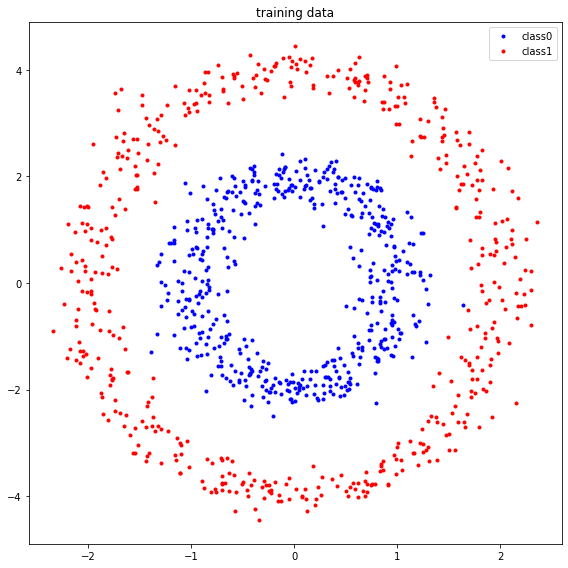

In [20]:
plot_data(data1)

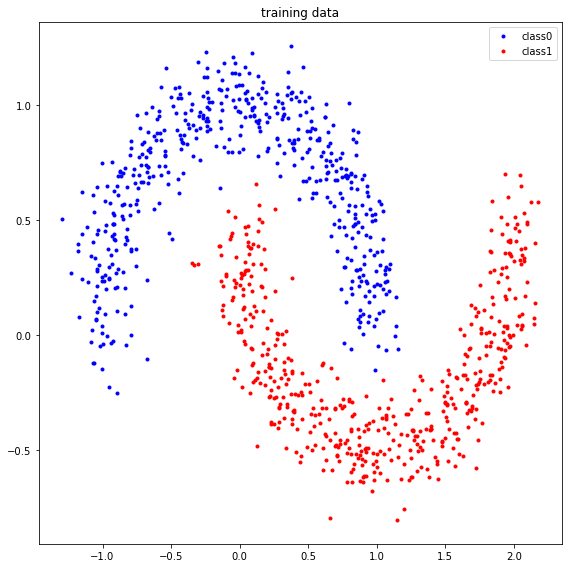

In [21]:
plot_data(data2)

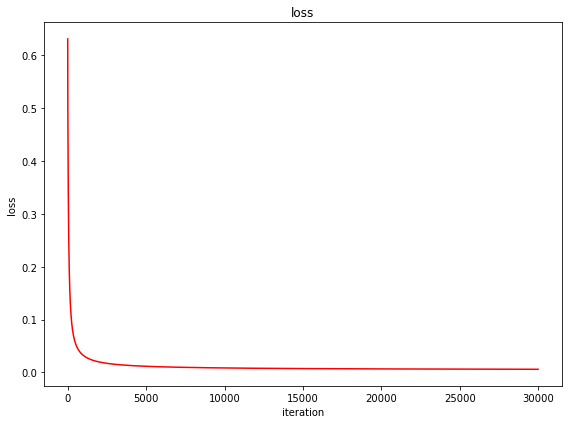

In [22]:
plot_loss_curve(loss1_iteration)

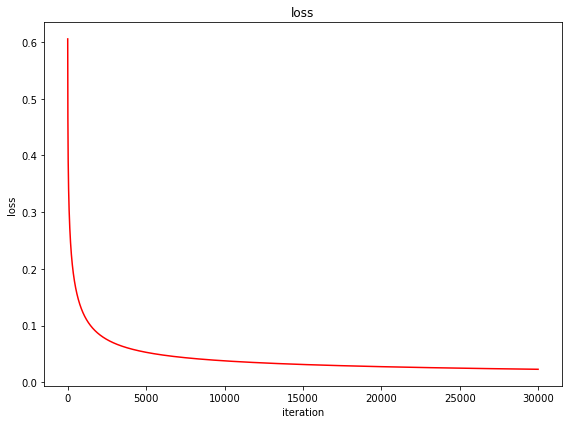

In [23]:
plot_loss_curve(loss2_iteration)

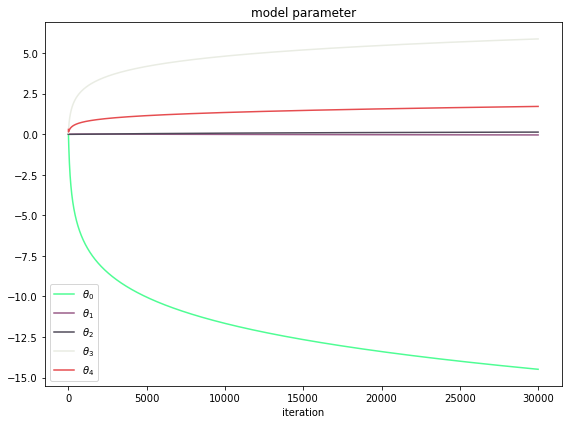

In [24]:
plot_model_parameter(theta1_iteration)

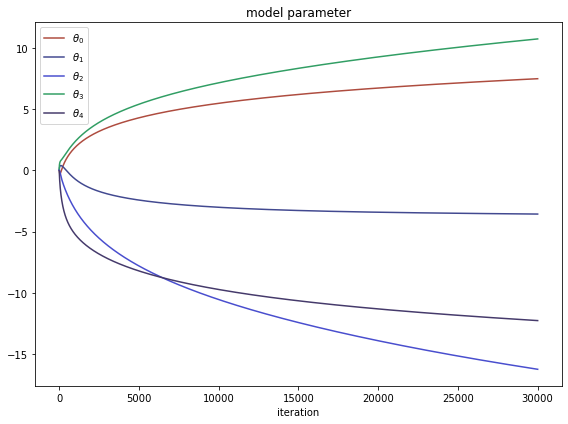

In [25]:
plot_model_parameter(theta2_iteration)

In [26]:
x_value = np.arange(-2.5, 2.5, 0.01)
y_value = np.arange(-4.5, 4.5, 0.01)
xs, ys = np.meshgrid(x_value, y_value)

z = theta1[0] + theta1[1] * xs + theta1[2] * ys + theta1[3] * np.power(xs, 2) + theta1[4] * np.power(ys, 2)
    

In [27]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    # meshgrid
    x_value = np.arange(-2.5, 2.5, 0.01)
    y_value = np.arange(-4.5, 4.5, 0.01)
    xs, ys = np.meshgrid(x_value, y_value)
    
    z = theta[0] + theta[1] * xs + theta[2] * ys + theta[3] * np.power(xs, 2) + theta[4] * np.power(ys, 2)
    
    norm = colors.TwoSlopeNorm(vcenter=0)
    plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)
    plt.colorbar()

    # data plot
    class0 = data[data[:,2] == 0][:,0:2]
    class1 = data[data[:,2] == 1][:,0:2]
    plt.plot(class0[:,0], class0[:,1], '.', color = 'blue', label = 'class0')
    plt.plot(class1[:,0], class1[:,1], '.', color = 'red', label = 'class1')

    # linear regression function
    cs = plt.contour(xs, ys, z, levels=0, colors='k')
    
    plt.legend()

    plt.show()

In [28]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure

    # meshgrid
    x_value = np.arange(-1.5, 3, 0.01)
    y_value = np.arange(-1, 1.5, 0.01)
    xs, ys = np.meshgrid(x_value, y_value)
    
    z = theta[0] + theta[1] * xs + theta[2] * np.power(xs, 2) + theta[3] * np.power(xs, 3) + theta[4] * ys
    
    norm = colors.TwoSlopeNorm(vcenter=0)
    plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)
    plt.colorbar()

    # data plot
    class0 = data[data[:,2] == 0][:,0:2]
    class1 = data[data[:,2] == 1][:,0:2]
    plt.plot(class0[:,0], class0[:,1], '.', color = 'blue', label = 'class0')
    plt.plot(class1[:,0], class1[:,1], '.', color = 'red', label = 'class1')

    # linear regression function
    cs = plt.contour(xs, ys, z, levels=0, colors='k')
    
    plt.legend()

    plt.show()

<ipython-input-27-47a534707faa>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)


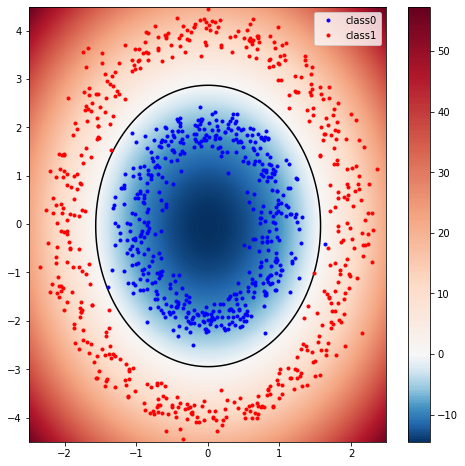

In [29]:
plot_classifier1(data1, theta1_optimal)

<ipython-input-28-693988df5c5c>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)


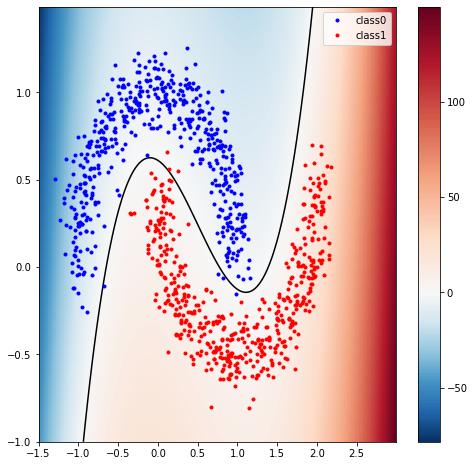

In [30]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

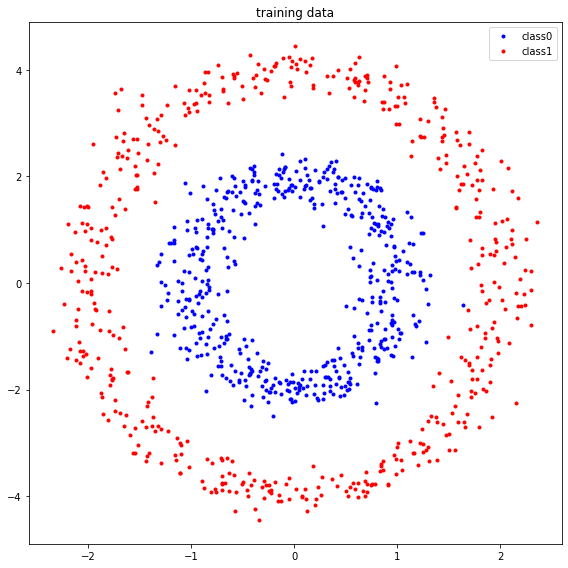

In [31]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

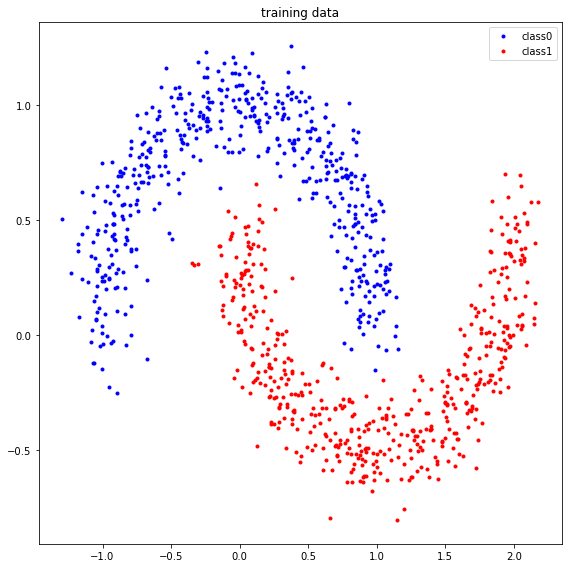

In [32]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

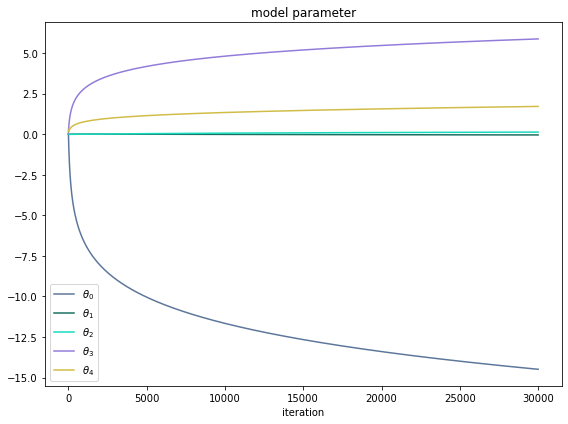

In [33]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

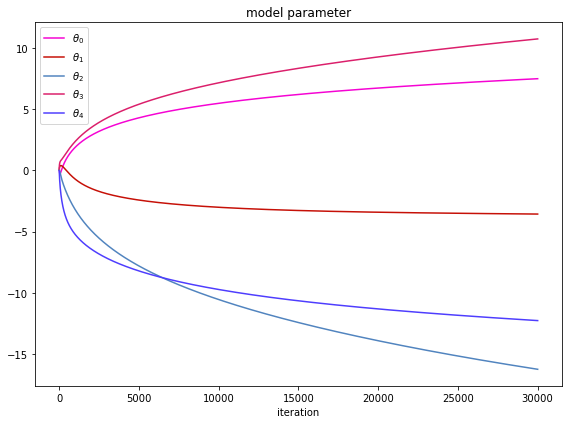

In [34]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

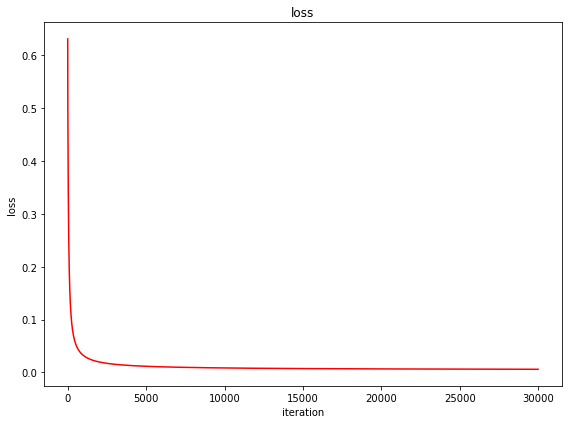

In [35]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

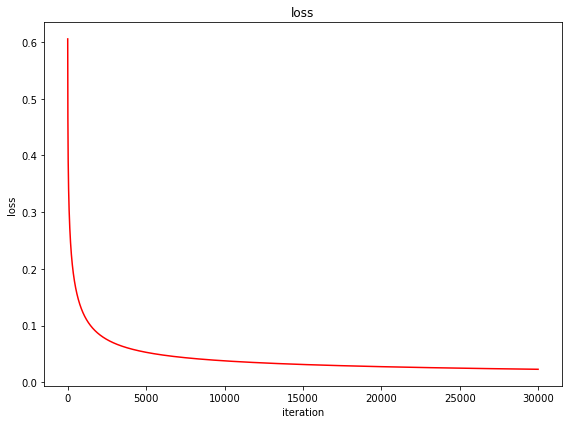

In [36]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

<ipython-input-27-47a534707faa>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)


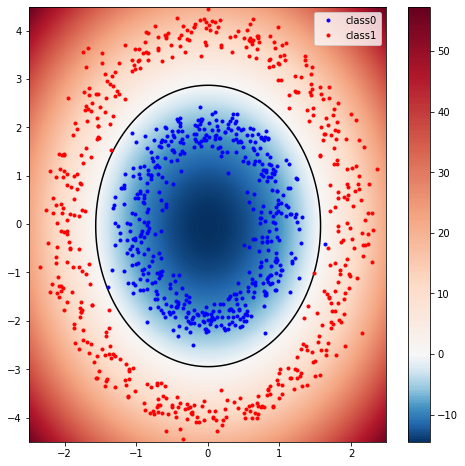

In [37]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

<ipython-input-28-693988df5c5c>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)


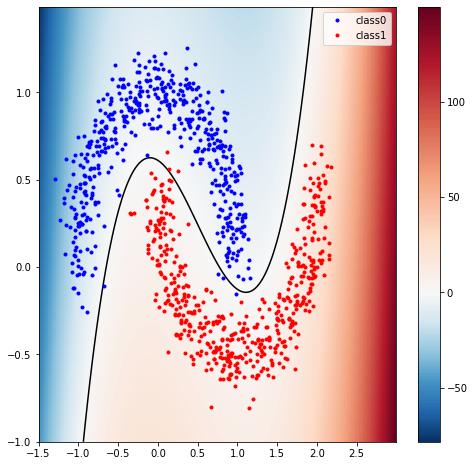

In [38]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [39]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [40]:
print(accuracy_classifier2)

0.993
